### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
%matplotlib inline

In [77]:
df = pd.read_csv("vehicle.csv")
df = df.dropna()

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

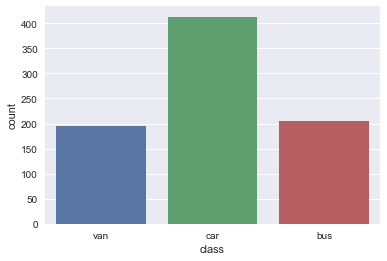

In [78]:
x = df["class"]
sns.countplot(x)

### Check for any missing values in the data 

In [79]:
df.count()

compactness                    813
circularity                    813
distance_circularity           813
radius_ratio                   813
pr.axis_aspect_ratio           813
max.length_aspect_ratio        813
scatter_ratio                  813
elongatedness                  813
pr.axis_rectangularity         813
max.length_rectangularity      813
scaled_variance                813
scaled_variance.1              813
scaled_radius_of_gyration      813
scaled_radius_of_gyration.1    813
skewness_about                 813
skewness_about.1               813
skewness_about.2               813
hollows_ratio                  813
class                          813
dtype: int64

### 3. Standardize the data 

In [98]:
from scipy.stats import zscore
df.info()
X = stats.zscore(df.loc[:, df.columns != 'class'])
df = df.loc[:, df.columns != 'class']
df_z = df.apply(zscore)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Plotting Elbow/ Scree Plot

In [83]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Let us check optimal number of clusters-
distortion = []

cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(X, clusters.cluster_centers_, 'euclidean'), axis=1))/ X.shape[0])

  # cdist computes distance between records of X and cluster_centers using euclidian method above
  # since we are using euclidian, it will do (xi - xbar)^2 for every record in X in all dimensions and add underroot to get dist
  # It will assign a given record to that cluster whos distance is min
  # Sum up all the distances between data points and their cluster centers and append that to distortions array
  # Distortions is the total spread among data points in all clusters put together
  # Distortions will be 0 when each data point is a cluster but that is not useful to extract any information
  # Distortion is another measure of spread, equivalent to intertia


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,cluster_errors,num_clusters
0,14634.000000,1
1,8623.136976,2
2,7037.467395,3
3,5739.201327,4
4,5189.216819,5
5,4706.433256,6
6,4348.840290,7
7,4141.768477,8
8,3846.965485,9


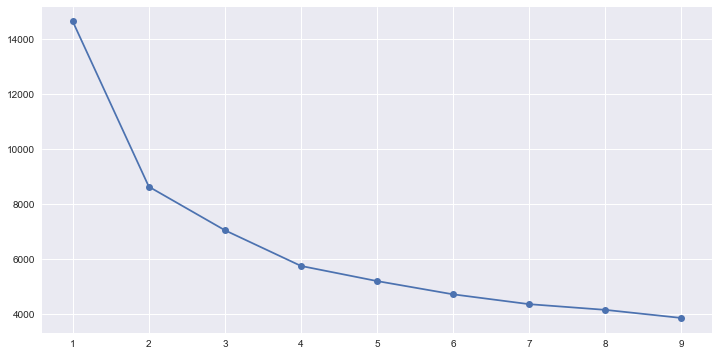

In [84]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
# The elbow plot confirms our visual analysis that there are likely 2 good clusters
# Let us start with 2 clusters

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [90]:
# Number of clusters

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.2339617  -0.57387481 -0.30776905 -0.03041322  0.2050726  -0.11653151
  -0.45904181  0.32506329 -0.48798836 -0.53604446 -0.41380935 -0.46366305
  -0.60155031 -0.61924057 -0.06177969  0.01066762  0.81278556  0.69897299]
 [ 1.13076532  1.17094237  1.19500584  1.01909505  0.21505188  0.34250798
   1.27180461 -1.19061224  1.27548416  1.09266768  1.22038121  1.28132727
   1.07954232 -0.02879497  0.16229031  0.26566456 -0.00535553  0.18380067]
 [-0.91987072 -0.52009251 -0.89320752 -1.06435572 -0.50042171 -0.2190738
  -0.7791213   0.86589322 -0.74535635 -0.484632   -0.78240328 -0.78341064
  -0.38498232  0.83878747 -0.09524349 -0.30171562 -1.05420601 -1.11069466]]


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 5. Store the centroids in a dataframe with column names from the original dataset given 

In [96]:
centroid_df = pd.DataFrame(centroids, columns = list(df_z))
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [101]:
kmeans.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0,
       1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0,
       1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0,
       1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 2,

## Hierarchical Clustering 

### 6. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [102]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [118]:
df_a = pd.DataFrame(a)
df_b = pd.DataFrame(b)
df_c = pd.DataFrame(c)

### 7. Combine all three arrays a,b,c into a dataframe

In [127]:
df_col = pd.concat([df_a,df_b,df_c], axis=0)
#df.plot('x', 'y', kind='scatter')
df_col.columns = ["A1" , "A2"]
df_col.shape

(250, 2)

### 8. Use scatter matrix to print all the 3 distributions

C:\Users\ysingh31\AppData\Local\contin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9CA018AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E9C9FFDC50>]], dtype=object)

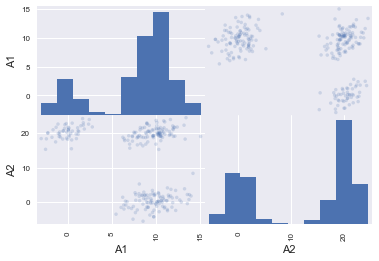

In [129]:
pd.scatter_matrix(df_col, alpha=0.2)

In [140]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist


### 9. Find out the linkage matrix

In [133]:
Z = linkage(df_col, 'average')
Z

array([[  3.00000000e+01,   5.50000000e+01,   9.28417855e-03,
          2.00000000e+00],
       [  1.77000000e+02,   1.80000000e+02,   1.92296044e-02,
          2.00000000e+00],
       [  1.00000000e+01,   8.50000000e+01,   1.97099286e-02,
          2.00000000e+00],
       [  3.70000000e+01,   6.30000000e+01,   2.60997459e-02,
          2.00000000e+00],
       [  2.23000000e+02,   2.42000000e+02,   3.96298934e-02,
          2.00000000e+00],
       [  4.10000000e+01,   8.40000000e+01,   4.72957782e-02,
          2.00000000e+00],
       [  1.11000000e+02,   1.36000000e+02,   6.15879236e-02,
          2.00000000e+00],
       [  4.80000000e+01,   9.90000000e+01,   7.91744731e-02,
          2.00000000e+00],
       [  7.70000000e+01,   8.80000000e+01,   9.09606616e-02,
          2.00000000e+00],
       [  2.33000000e+02,   2.44000000e+02,   9.39675154e-02,
          2.00000000e+00],
       [  1.86000000e+02,   1.95000000e+02,   1.00830786e-01,
          2.00000000e+00],
       [  2.07000000e

Use ward as linkage metric and distance as Eucledian

### 10. Plot the dendrogram for the consolidated dataframe

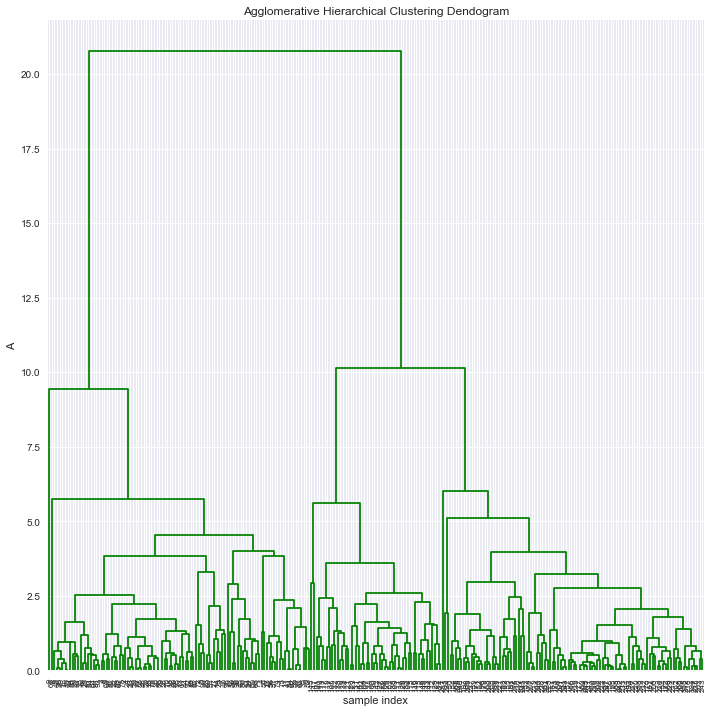

In [135]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('A')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 11. Recreate the dendrogram for last 12 merged clusters 

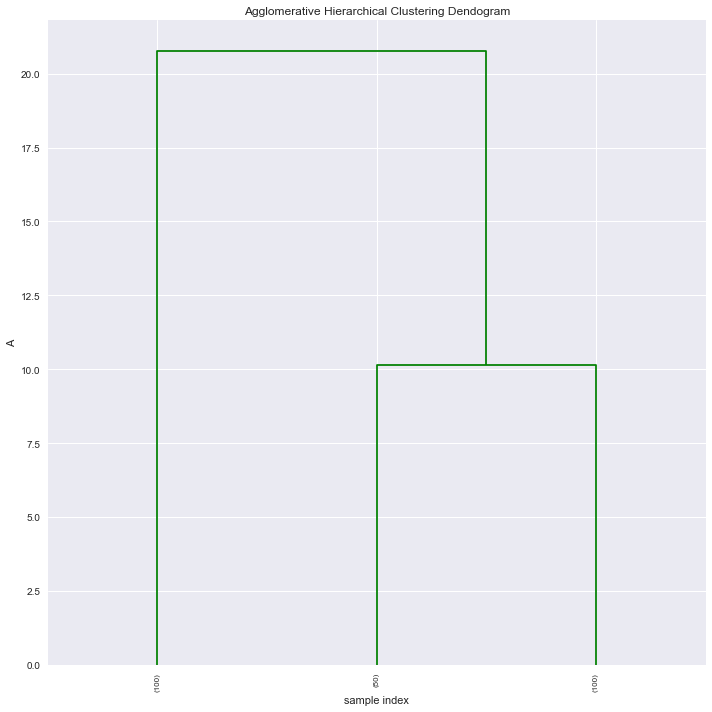

In [146]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('A')
dendrogram(Z,truncate_mode="lastp", p=3, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 12. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [143]:
c, coph_dists = cophenet(Z , pdist(df_col))
c

0.9598262833254334

### 13. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [151]:
from scipy.cluster.hierarchy import fcluster
fcluster_plot = fcluster(Z ,10 , criterion = "distance")
fcluster_plot

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

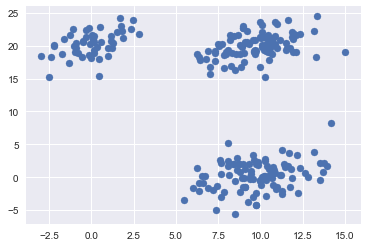

In [154]:
plt.scatter(x = df_col["A1"] , y = df_col["A2"])